## **DS-GA 1007 $\:$ | $\,$ Lecture 8**

## **Programming for Data Science**

<br>

---

#### Jeremy Curuksu, PhD

#### NYU Center for Data Science

#### jeremy.cur@nyu.edu

#### November 06, 2023


## **Pandas: Advanced Data Objects (Part 2)**

<br>

### **Last week**:

### ▶ Introducing Pandas objects: Series and Data Frames

### ▶ Indexing and Selection of Data Frames with Pandas

<br>

### **Today**:

### ▶ Operating on Data Frames in Pandas 

### ▶ Basic Statistical Aggregate Operations in Pandas 

### ▶ Handling Missing Values in Pandas 


# Topics covered on Pandas in this course

• **Part 1**: Pandas series and data frames, indexing and selection, fancy indexing, Boolean and hierarchical indexing, reshaping

• **Part 2**: Operating on data with Pandas, handling missing values

• **Part 3**: Statistical analysis with Pandas (aggregation, group operations, merging, joining)

• **Part 4**: Manipulating, analyzing and vizualizing time series with Pandas



# Introduction

https://pandas.pydata.org


**Pandas is a Python package for data manipulation and analysis that builds on top of NumPy, so all NumPy functionalities can be leveraged when using Pandas. Pandas adds functionalities to help manipulate and analyze "any kind" of data**. NumPy's ndarray data structure provides functionalities for the type of clean, well-organized data typically seen in numerical computing tasks. While it serves this purpose very well, its limitations become clear when we need more flexibility e.g., **attaching labels to data, working with missing data, complex merging and groupings, pivots, etc**. These more advanced operations are an important piece of analyzing the less structured data available in many forms in the world around us. Pandas provides efficient access to these sorts of data manipulation tasks that occupy much of a data scientist's time.

**Pandas offers the data structures called `Series` and `DataFrame`**, which are arrays with attached row and column labels, and often with heterogeneous types and/or missing data. Pandas offers a convenient storage interface for labeled data and powerful data operations familiar to users of both database frameworks and spreadsheet programs.

**A `Series` is essentially a 1D array, and a `DataFrame` is a multidimensional array** i.e., a set of `Series` (similar to the difference between a vector and a matrix in linear algebra mentioned in the lecture on NumPy). 


**A third data structure called `index` is also available**. As its name suggests, `index` is a series of indices, generally some labels attached to some data, which can be manipulated on its own and/or attached to a `Series` or `DataFrame` object.

**Pandas is a free open source package** originally created by Wes McKinney, a mathematician who worked in Finance and needed to analyze time series. This explains why **Pandas has advanced functionalities to manipulate and analyse time series, such as date range generation and frequency conversion, moving window statistics, date shifting and lagging, etc**. The name is derived from the term "panel data", an econometrics term for datasets that include observations over multiple time periods. Its name is a play on the phrase "Python data analysis". 


# Case study examples with Pandas

There will be four lectures on Pandas. As we explore more advanced concepts, we will illustrate them directly with case studies. For those of you who would like to start looking at case studies now, I recommend you start with these:

* Carpentry (indexing, slicing): https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html

* Carpentry (data exploration): https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/index.html

* Carpentry (data type and format): https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/index.html

* Carpentry (Combining data frames): https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html

* Kaggle (data exploration): https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas/notebook

* AWS AI Blog (ML application): https://aws.amazon.com/blogs/machine-learning/developing-a-business-strategy-by-combining-machine-learning-with-sensitivity-analysis/



# Online Documentation
The [pandas.pydata.org](https://pandas.pydata.org) website is the primary online resource for the library's documentation, tutorials, and other resources

To display Pandas's built-in documentation:

```ipython
pd?
```

To display the pandas namespace:

```ipython
pd.<TAB>
```

Pandas Cheatsheet: https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

# Import Pandas as a library:


In [264]:
import pandas as pd # Abbreviations "pd" is semi-standardized...
import numpy as np  # We will also be using NumPy in this lecture

# 1) Operating on Data Frames in Pandas 

Pandas builds on NumPy, and thereby inherits much of NumPy's functionality. In particular, NumPy can perform quick element-wise operations using vectorized operations, both with basic arithmetic (e.g., addition, subtraction, multiplication) and with more sophisticated operations (e.g., trigonometric functions, exponential, logarithmic). 

But Pandas adds functionalities to **preserve index and column labels in the output** (for unary operations like negation and trigonometric functions), and automatically **align indices when passing the objects to operators** (for binary operations such as addition and multiplication, etc). 

**Index preservation and alignment is what allows to keep the context of data (indices, labels) while operating on data frames and combining data from different sources**.

## 1.1) Index preservation in Pandas

### Index preservation on Pandas Series

In [265]:
ser = pd.Series([1, 3, 5, 10])
ser

0     1
1     3
2     5
3    10
dtype: int64

In [266]:
np.exp(ser)

0        2.718282
1       20.085537
2      148.413159
3    22026.465795
dtype: float64

### Index preservation on Pandas Data Frames

In [267]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,0,1,7
1,8,0,6
2,5,8,1


In [268]:
np.exp(df)

,A,B,C
0,1.000000,2.718282,1096.633158
1,2980.957987,1.000000,403.428793
2,148.413159,2980.957987,2.718282


## 1.2) Index alignment in Pandas

Pandas aligns indices when performing an operation.

This is convenient in particular when working with incomplete data. If there is an index for which one or several item(s) do not exist, the result will be marked as `None` for non-numerical objects, and `NaN` ("Not a Number") for numerical objects.

### Index alignment with Pandas Series
(Example taken from J. Vanderplas' book)

In [269]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [270]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

#### Method to create a new index union of all indices

In [271]:
# area.index | population.index # Deprecated
area.index.union(population.index)

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

#### Fill-in NaN using Pandas object methods
We will discuss how to manage (i.e., detect, delete, or replace) missing values in section 2 of this lecture. For now let's just introduce how to  replace `NaN` by `0` while doing operations in Pandas.  

Depending on the desired result, this can be done either on top of standard Python operators applied to Pandas Object, or within Pandas built-in methods. 

In [272]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

In [273]:
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [274]:
(A + B).fillna(0) # Semantic: Fill NaNs with 0 in the resulting series

0    0.0
1    5.0
2    9.0
3    0.0
dtype: float64

In [275]:
A.add(B, fill_value=0) # Semantic: Fill NaNs with 0 in the original series

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64



#### Python Operators and equivalent Pandas object methods:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


### Index alignment with Pandas DataFrame


In [276]:
dfa = pd.DataFrame(np.random.randint(0, 10, (2, 2)), columns=['A', 'B'])
dfa

,A,B
0,9,2
1,6,7


In [277]:
dfb = pd.DataFrame(np.random.randint(0, 10, (4, 4)), columns=['A', 'B', 'C', 'D'])
dfb

,A,B,C,D
0,2,5,7,7
1,3,4,5,7
2,6,9,1,9
3,2,7,4,7


In [278]:
dfa + dfb

,A,B,C,D
0,11.0,7.0,NaN,NaN
1,9.0,11.0,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


### Fill-in NaN using Pandas object methods

In [279]:
(dfa + dfb).fillna(0) # Semantic: Fill with 0 in the resulting data frame

,A,B,C,D
0,11.0,7.0,0.0,0.0
1,9.0,11.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


In [280]:
dfa.add(dfb, fill_value=0) # Semantic: Fill with 0 in original data frames

,A,B,C,D
0,11.0,7.0,7.0,7.0
1,9.0,11.0,5.0,7.0
2,6.0,9.0,1.0,9.0
3,2.0,7.0,4.0,7.0


## 1.3) Operations Between DataFrame, Series, and Arrays

When performing operations between a DataFrame and a Series, the index and column alignment is similarly maintained. Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy arrays. You can even perform operations between Pandas data frames and NumPy arrays

### Row-wise operations ("*operations along the columns*")

In [281]:
# Let's operate on dfb, a data frame with 4 rows and 4 columns
dfb

,A,B,C,D
0,2,5,7,7
1,3,4,5,7
2,6,9,1,9
3,2,7,4,7


In [282]:
dfb - np.ones(4) # np.ones() is a row-vector with 4 elements filled with 1s

,A,B,C,D
0,1.0,4.0,6.0,6.0
1,2.0,3.0,4.0,6.0
2,5.0,8.0,0.0,8.0
3,1.0,6.0,3.0,6.0


In [283]:
dfb - dfb.iloc[1] # dfb.iloc[1] is the row located at index position 1

,A,B,C,D
0,-1,1,2,0
1,0,0,0,0
2,3,5,-4,2
3,-1,3,-1,0


### Column-wise operations ("*operations along the rows*")

Pandas' default broadcasting rule  between a 2D array and a 1D array is applied row-wise ("along the columns"). 

To broadcast column-wise ("along the rows") when performing operations, we need to use Pandas object methods and specify the `axis` keyword.

In [284]:
dfb

,A,B,C,D
0,2,5,7,7
1,3,4,5,7
2,6,9,1,9
3,2,7,4,7


In [285]:
# By default, broadcasting is row-wise 
# Thus a row needs be passed, not a column...
dfb - dfb['A']

,A,B,C,D,0,1,2,3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
# To broadcast column-wise, we need use Pandas object methods
dfb.subtract(dfb['A'], axis=0)  # axis=0 indicates the values passed are for "rows" = broadcast along the rows ("column-wise")

,A,B,C,D
0,0,3,5,5
1,0,1,2,4
2,0,3,-5,3
3,0,5,2,5


## 1.4) Introduction to Statistical Analysis in Pandas

An essential piece of analyzing data is statistical summarization: computing aggregate statistics like `sum()`, `mean()`, `median()`, `min()`, and `max()`, in which a single number gives insight into the nature of a potentially large dataset.

Pandas inherits all of NumPy's statistical aggregation methods, and adds a few others:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

As we will see in the next lecture, Pandas offers lots of other, more advanced functionalities on top of standard statistical aggregates, to aggregate conditionally on some labels or indices. For today, let's just look at basic statistical aggregates.

###  Statistical Aggregates on Pandas Series

As with a one-dimensional NumPy array, for a Pandas ``Series`` the aggregations return a single value:

In [287]:
series = pd.Series(np.random.rand(10))
series

0    0.217410
1    0.029913
2    0.922896
3    0.986163
4    0.990651
5    0.962875
6    0.253330
7    0.284928
8    0.034777
9    0.722953
dtype: float64

In [288]:
series.count() # counts the number of non-null values

10

In [289]:
series.nunique() # series.unique() # series.value_counts()

10

In [290]:
series.sum()

5.405894378994491

In [291]:
series.mean()

0.5405894378994491

In [292]:
series.median()

0.5039402598737552

In [293]:
series.min()

0.029913119134260757

In [294]:
series.max()

0.9906506217079468

###  Statistical Aggregates on Pandas Data Frames

For a ``DataFrame``, by default the aggregates return a result for each column (i.e., *aggregate over rows*)

In [295]:
df = pd.DataFrame({'colA': np.random.rand(10),
                   'colB': np.random.rand(10)
                  })
df

,colA,colB
0,0.970388,0.295169
1,0.119657,0.162984
2,0.966088,0.824625
3,0.008722,0.586856
4,0.850313,0.218291
5,0.456266,0.646181
6,0.574898,0.978436
7,0.592349,0.674241
8,0.555803,0.153358
9,0.988364,0.570120


In [296]:
df.mean()

colA    0.608285
colB    0.511026
dtype: float64

In [297]:
df.mean(axis='rows')

colA    0.608285
colB    0.511026
dtype: float64

In [298]:
df.mean(axis=0)

colA    0.608285
colB    0.511026
dtype: float64

To return an aggregate for each row (i.e., *aggregate over columns*), we can specify the ``axis`` argument to be `columns`: 

In [300]:
df.mean(axis='columns')

0    0.632779
1    0.141321
2    0.895357
3    0.297789
4    0.534302
5    0.551223
6    0.776667
7    0.633295
8    0.354580
9    0.779242
dtype: float64

In [299]:
df.mean(axis=1)

0    0.632779
1    0.141321
2    0.895357
3    0.297789
4    0.534302
5    0.551223
6    0.776667
7    0.633295
8    0.354580
9    0.779242
dtype: float64

## Pandas method `describe()`

The method ``describe()`` computes several common aggregates for each column and returns the result: count, mean, min, max, std, percentiles. 

This method is useful to quickly inspect and understand the overall properties of a dataset.




To illustrate, let's briefly look at the public Penguin dataset from *"Seaborn: statistical data visualization"* (http://seaborn.pydata.org/)



In [301]:
import seaborn as sns

In [302]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [303]:
penguins = sns.load_dataset('penguins')

In [304]:
penguins.shape

(344, 7)

In [305]:
penguins.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<img src="./penguins.jpeg" width="400">

In [306]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


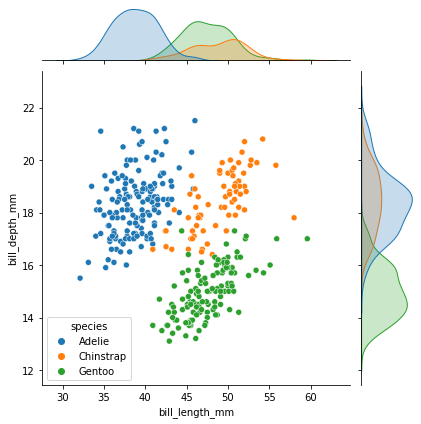

In [307]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species") #, kind="kde")

In [308]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [310]:
penguins['bill_length_mm'][penguins['species'] == 'Chinstrap'].mean()

48.83382352941177

#### *More advanced* statistical operations will be covered next week

# 2) Handling Missing Data in Pandas

Real-world data is rarely clean and homogeneous. In particular, many datasets have some data missing. Even worse, different data sources may indicate missing data in different ways.

Pandas represents missing data using what's called the sentinel approach, meaning it *flags* missing data using a specific convention. It flags null values by ``None`` for all non-numerical objects, and by ``NaN``for floating-point numbers.

## ``None``: Missing data for non-float objects
 ``None`` is a Python object and cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type ``'object'`` (i.e., arrays of Python objects):

In [311]:
a = np.array([1, None, 2, 3, 4, 5])
a

array([1, None, 2, 3, 4, 5], dtype=object)

This ``dtype=object`` shows that the best common type representation NumPy could infer for the contents of the array is that they are Python objects.

As soon as there is `None` in an array (or data frame), aggregation operations like ``sum()`` or ``min()`` across the array will lead to an error:

In [312]:
a.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

This reflects the fact that summation between an integer and an object `None` is undefined.

## ``NaN``: Missing data for float objects

NaN (acronym for *Not a Number*) is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.

This allows NumPy/Pandas to choose a native floating-point type for arrays and data frames even when they contain missing data:

In [313]:
a = np.array([10, np.nan, 30, 40, 50])
a

array([10., nan, 30., 40., 50.])

In [314]:
a.dtype

dtype('float64')

### Arithmetic operations with NaN

Missing data, even when represented as a NaN, are still a problem, because regardless of the operation performed with NaN numbers, the result will be another NaN

In [315]:
10 + np.nan

nan

In [316]:
10 *  np.nan

nan

In [317]:
0 * np.nan 

nan

### Statistical aggregate operations with NaN

In [318]:
a.min(), a.max(), a.sum() 

(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [319]:
np.nanmin(a), np.nanmax(a), np.nansum(a), np.nanmean(a)

(10.0, 50.0, 130.0, 32.5)

## NaN vs. None in Pandas


Pandas is built to handle ``NaN`` and ``None`` nearly interchangeably, and **automatically converts between them where appropriate**:

In [320]:
pd.Series([1.2, np.nan, 3.0, None, 5.0]) # Convert None to NaN given context

0    1.2
1    NaN
2    3.0
3    NaN
4    5.0
dtype: float64

In [321]:
pd.Series([1, 2, 3, None, 5]) # Upcast integer to float, and convert None to NaN

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

## Operating on Null Values in Pandas

Pandas offers several methods for detecting, deleting, and replacing null values in Pandas data structures:

- ``isnull()``: Generate a boolean mask indicating missing values

- ``notnull()``: Opposite of ``isnull()``

- ``dropna()``: Return a filtered version of the data

- ``fillna()``: Return a copy of the data with missing values filled or imputed


### Detecting null values

- Pandas offers two methods for detecting null values: ``isnull()`` and ``notnull()``

- They both returns a Boolean mask which can be used directly as a ``Series`` or ``DataFrame`` index (as discussed in lectures on NumPy and Pandas Part 1)



In [322]:
data = pd.Series([1, np.nan, 3, None, 5])

In [323]:
# Null index
data.isnull()

0    False
1     True
2    False
3     True
4    False
dtype: bool

In [324]:
# Not Null index
data.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

This Boolean mask can be used directly as index to select data

In [325]:
data[data.notnull()]

0    1.0
2    3.0
4    5.0
dtype: float64

### Dropping null values in Pandas

Pandas offers a method for deleting null values: ``dropna()``


#### Dropping null values in Series is straighforward

In [326]:
data

0    1.0
1    NaN
2    3.0
3    NaN
4    5.0
dtype: float64

In [327]:
data.dropna()

0    1.0
2    3.0
4    5.0
dtype: float64

#### Dropping null values in Data Frames requires a specification of dimension

We cannot drop single values from a Data Frame, we can only drop full rows or full columns. Depending on the application, you might want one or the other, so `dropna()` offers several options for Data Frames.

By default, `dropna()` drops all **rows** in which any null value is present:

In [328]:
df = pd.DataFrame([[1, np.nan, 3],
                   [4, 5, 6],
                   [np.nan, 8, 9]])
df

,0,1,2
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [329]:
df.dropna()

,0,1,2
1,4.0,5.0,6


We can specify another dimension, for example to drop **columns** which contain null values:

In [330]:
df.dropna(axis=1) # Drop all columns in which any null value is present 

,2
0,3
1,6
2,9


In [331]:
df.dropna(axis='columns')

,2
0,3
1,6
2,9


#### Dropping null values based on some threshold parameters

Given we generally want to eliminate entire rows or columns *only if* the number of null values is excessively high, and handle the rest differently (see next section), Pandas offers ``how`` or ``thresh`` parameters for a finer control on the number of null values to allow through.

#### Parameter ``how``

By default, Pandas uses the parameter ``how='any'``, meaning any row or column (depending on the axis keyword) containing a null value will be dropped. 

But if we specify ``how='all'``, Pandas will only drop rows/columns that are *all* null values:

In [332]:
df

,0,1,2
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [333]:
df.dropna(axis='columns', how='all') 

,0,1,2
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [334]:
df.dropna(axis='columns', how='any')

,2
0,3
1,6
2,9


####  Parameter ``thresh`` 
Specify a minimum number of **non**-null values for the rows or columns (depending on the axis keyword) to be kept. If the number of non-null values is less than the specified threshold, the corresponding  rows/columns will be dropped

In [335]:
df.dropna(axis='rows', thresh=2) # Drop rows with < 2 non-null values

,0,1,2
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [336]:
df.dropna(axis='rows', thresh=3) # Drop rows with < 3 non-null values

,0,1,2
1,4.0,5.0,6


### Filling in null values in Pandas

Pandas offers a method for filling in null values: ``fillna()`` 

The purpose of ``fillna()`` is, instead of dropping NaN values, to replace them with a valid and useful value, either a predefined number (e.g., 0) or some imputation based on other values in the dataset (e.g., median of a column)


In [337]:
df = pd.DataFrame([[1, np.nan, 3],
                   [4, 5, 6],
                   [np.nan, 8, 9]], 
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


#### Fill `NaN` with a predefined value

In [338]:
df.fillna(0)

,A,B,C
0,1.0,0.0,3
1,4.0,5.0,6
2,0.0,8.0,9


#### Fill `NaN` with `forward fill` 

Propagate the previous value forward 

By default Pandas forward fills by row (using the previous value in each column), but we can explicitly specify an axis along which the forward fill should take place

In [339]:
df

,A,B,C
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [340]:
df.fillna(method='ffill') # Same as df.fillna(method='ffill', axis=0) 

,A,B,C
0,1.0,NaN,3
1,4.0,5.0,6
2,4.0,8.0,9


Notice that if a previous value is not available during a forward fill, the NaN value remains.

In [341]:
df.fillna(method='ffill', axis=1) # Forward fill by column 

,A,B,C
0,1.0,1.0,3.0
1,4.0,5.0,6.0
2,NaN,8.0,9.0


#### Fill `NaN` with `backward fill` 

Propagate the next value backward

In [342]:
df

,A,B,C
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [343]:
df.fillna(method='bfill') 

,A,B,C
0,1.0,5.0,3
1,4.0,5.0,6
2,NaN,8.0,9


In [344]:
df.fillna(method='bfill', axis=1) 

,A,B,C
0,1.0,3.0,3.0
1,4.0,5.0,6.0
2,8.0,8.0,9.0


#### Fill `NaN` with the `mean` or `median` in each respective column

In [345]:
df

,A,B,C
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [346]:
df.mean()

A    2.5
B    6.5
C    6.0
dtype: float64

In [347]:
df.median()

A    2.5
B    6.5
C    6.0
dtype: float64

In [348]:
df.fillna(df.mean())

,A,B,C
0,1.0,6.5,3
1,4.0,5.0,6
2,2.5,8.0,9


In [349]:
df.fillna(df.median())

,A,B,C
0,1.0,6.5,3
1,4.0,5.0,6
2,2.5,8.0,9


#### Fill `NaN` with the `mean` or `median` of a specific column/row

In [350]:
df['A'] = df['A'].fillna(df['B'].mean()) # Could fetch any column or row

In [351]:
df

,A,B,C
0,1.0,NaN,3
1,4.0,5.0,6
2,6.5,8.0,9


More advanced techniques for imputation of `NaN` values include training a ML model to predict missing values in one column based on values in other columns (out of scope for this course)


## Please visit these URLs and challenge yourself on the practice exercises:

https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/index.html

https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/index.html

Metadata on this dataset can be found here: https://www.esapubs.org/archive/ecol/E090/118/Portal_rodent_metadata.htm

**Seen last week**:

In [352]:
surveys = pd.read_csv("./surveys.csv") 

In [353]:
surveys.shape

(35549, 9)

In [354]:
surveys.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [355]:
surveys.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [356]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [357]:
surveys.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


**Not seen last week**:

In [358]:
# Produce basic statistics for all data
surveys.describe() 

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


In [359]:
# Or for a specific column
surveys['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

**Practice Exercice**:

In [ ]:
# 1) Count the number of missing values per column

In [ ]:
# 2) Compute the median weight 

In [363]:
surveys['weight'].dropna().median()

37.0

In [ ]:
# 3) Compute the median weight after replacing NaNs by the mean  
#    of the weight column 

In [361]:
surveys['weight'].fillna(surveys['weight'].mean()).median() 

40.0

In [ ]:
# 4) Describe basic statistics on the entire dataset after removing 
#    rows with NaN 

In [362]:
surveys.dropna().describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000
mean,18474.903116,6.548409,16.172741,1990.980310,11.224051,29.213392,41.791368
std,10076.817290,3.443644,8.155777,7.362829,6.797744,9.541330,35.673195
min,63.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,9882.500000,4.000000,10.000000,1985.000000,5.000000,21.000000,20.000000
50%,18658.500000,7.000000,16.000000,1991.000000,11.000000,31.000000,36.000000
75%,27132.250000,10.000000,23.000000,1997.000000,17.000000,36.000000,47.000000
max,35548.000000,12.000000,31.000000,2002.000000,24.000000,64.000000,280.000000


In [ ]:
# 5) How many of the "record_id" are females and how many are males?

## Thank you Everyone!